In [173]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [174]:
global_terrorism_model_df = pd.read_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/midterm_project/data/global_terrorism.csv')
global_terrorism_model_df.drop(columns= ['Unnamed: 0'], inplace=True)
global_terrorism_model_df.columns

Index(['eventid', 'approxdate', 'extended', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'gname', 'motive',
       'guncertain1', 'individual', 'nperps', 'nperpcap', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'nkill', 'nkillter', 'nwound', 'nwoundte', 'property', 'propextent',
       'propvalue', 'ransom', 'ransomamt', 'ransompaid'],
      dtype='object')

In [175]:
global_terrorism_model_df.isna().any()

eventid             False
approxdate          False
extended            False
country             False
country_txt         False
region              False
region_txt          False
provstate            True
city                 True
latitude             True
longitude            True
specificity          True
vicinity            False
crit1               False
crit2               False
crit3               False
doubtterr            True
multiple             True
success             False
suicide             False
attacktype1         False
attacktype1_txt     False
targtype1           False
targtype1_txt       False
targsubtype1         True
targsubtype1_txt     True
corp1                True
target1              True
natlty1              True
natlty1_txt          True
gname               False
motive              False
guncertain1          True
individual          False
nperps               True
nperpcap             True
weaptype1           False
weaptype1_txt       False
weapsubtype1

<h3>Preliminary Model<h3>

<h5>Questions:</h5>

1) Understand if there is a relationship between the target for terrorist attacks and other columns in the data set

2) Predict what targets are most likely to be hit depending on location and other predictors

3) what predictors are most important in predicting the target type

In [176]:
# Drop the independent variable and non-numeric columns
non_numeric_columns = global_terrorism_model_df.select_dtypes(exclude=['int64', 'float64']).columns
columns_to_drop = ['targtype1', 'targtype1_txt', 'eventid'] + non_numeric_columns.to_list()

# Drop the columns
X_subset = global_terrorism_model_df.drop(columns=columns_to_drop)

# Drop the columns with NaN
X_subset = X_subset.dropna(axis=1)

In [177]:
#define the data
def linear_regression_model(X, y):

    #split into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a model using statsmodels
    model = sm.OLS(y_train, sm.add_constant(X_train))
    results = model.fit()

    # Evaluate the model on the testing data
    y_pred = results.predict(sm.add_constant(X_test))

    return results, y_pred

In [178]:
#define data
X = X_subset
y = y = global_terrorism_model_df['targtype1']

In [179]:
# Fit the model and make predictions
model_results, y_pred = linear_regression_model(X, y)

<h5>Evaluate the preliminary model</h5>

In [180]:
#print the model summary to evaluate key coefficients
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     808.0
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7536e+05
No. Observations:              145316   AIC:                         9.507e+05
Df Residuals:                  145299   BIC:                         9.509e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.9158      0.275     50.640      

In [181]:
#employ backward stepwise regresion to fit the model better

#drop column with highest p_value
X_reg_1 = X_subset.drop(columns=['attacktype1'])

#refit the model
model_results, y_pred = linear_regression_model(X_reg_1, y)

In [182]:
#print results
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     861.8
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7536e+05
No. Observations:              145316   AIC:                         9.507e+05
Df Residuals:                  145300   BIC:                         9.509e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9177      0.274     50.717      0.0

In [183]:
#follow steps of backward stepwise regression again

#drop column with new highest p_value
X_reg_2 = X_reg_1.drop(columns=['ransomamt'])

#refit the model
model_results, y_pred = linear_regression_model(X_reg_2, y)


In [184]:
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     923.3
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7536e+05
No. Observations:              145316   AIC:                         9.507e+05
Df Residuals:                  145301   BIC:                         9.509e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9184      0.274     50.720      0.0

In [185]:
#drop column with new highest p_value
X_reg_3 = X_reg_2.drop(columns=['extended'])

#refit the model
model_results, y_pred = linear_regression_model(X_reg_3, y)

In [186]:
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     994.3
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7536e+05
No. Observations:              145316   AIC:                         9.507e+05
Df Residuals:                  145302   BIC:                         9.509e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9060      0.274     50.729      0.0

In [187]:
#drop column with new highest p_value
X_reg_4 = X_reg_3.drop(columns=['property'])

#refit the model
model_results, y_pred = linear_regression_model(X_reg_4, y)

In [188]:
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1077.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7536e+05
No. Observations:              145316   AIC:                         9.507e+05
Df Residuals:                  145303   BIC:                         9.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8994      0.274     50.722      0.0

In [189]:
#drop column with new highest p_value
X_reg_5 = X_reg_4.drop(columns=['individual'])

#refit the model
model_results, y_pred = linear_regression_model(X_reg_5, y)

In [190]:
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1175.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7536e+05
No. Observations:              145316   AIC:                         9.507e+05
Df Residuals:                  145304   BIC:                         9.509e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9036      0.274     50.743      0.0

In [191]:
X_reg_5.head()

,country,region,vicinity,crit1,crit2,crit3,success,suicide,weaptype1,propextent,ransom
0,58,2,0,1,1,1,1,0,13,0,0
1,160,5,0,1,1,1,1,0,13,0,0
2,78,8,0,1,1,1,1,0,6,-1,0
3,101,4,0,1,1,1,1,0,8,-1,0
4,217,1,0,1,1,1,1,0,5,3,0


In [192]:
#run a shapiro test on each column to test for normality, see which columns i can transform to improve the model fit

for col in X_reg_5.columns:
    stat, p_val = shapiro(X_reg_5[col])

    # Print the test result
    print(f"Column: {col}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"P-value: {p_val}")



Column: country
Shapiro-Wilk test statistic: 0.7037808895111084
P-value: 0.0
Column: region
Shapiro-Wilk test statistic: 0.8995320200920105
P-value: 0.0
Column: vicinity
Shapiro-Wilk test statistic: 0.2454093098640442
P-value: 0.0
Column: crit1
Shapiro-Wilk test statistic: 0.07924294471740723
P-value: 0.0
Column: crit2
Shapiro-Wilk test statistic: 0.054458796977996826
P-value: 0.0
Column: crit3
Shapiro-Wilk test statistic: 0.38588666915893555
P-value: 0.0
Column: success
Shapiro-Wilk test statistic: 0.3635677695274353
P-value: 0.0
Column: suicide
Shapiro-Wilk test statistic: 0.18194305896759033
P-value: 0.0
Column: weaptype1
Shapiro-Wilk test statistic: 0.5987258553504944
P-value: 0.0
Column: propextent
Shapiro-Wilk test statistic: 0.8000501990318298
P-value: 0.0
Column: ransom
Shapiro-Wilk test statistic: 0.054780423641204834
P-value: 0.0


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


From the Shapiro test we can see that all variables used in the model are not normally distributed, thus a transformation is needed to help fit the model better

In [193]:
#use a exp transformation on the right skewed data to see if it improves the model (country, suicide, ransom)
#create a data frame
exp_values  = {
    'exp_country': np.exp(X_subset['country']/100),
    'exp_suicide': np.exp(X_subset['suicide']), 
    'exp_ransom': np.exp(X_subset['ransom']), 
    'exp_propextent': np.exp(X_subset['propextent'])
    }

exp_X = pd.DataFrame(exp_values)

exp_X.head(10)

,exp_country,exp_suicide,exp_ransom,exp_propextent
0,1.786038,1.0,1.0,1.000000
1,4.953032,1.0,1.0,1.000000
2,2.181472,1.0,1.0,0.367879
3,2.745601,1.0,1.0,0.367879
4,8.758284,1.0,1.0,20.085537
5,8.846306,1.0,1.0,1.000000
6,8.758284,1.0,1.0,7.389056
7,8.758284,1.0,1.0,54.598150
8,8.758284,1.0,1.0,20.085537
9,8.758284,1.0,1.0,1.000000


In [194]:
X_subset.columns

Index(['extended', 'country', 'region', 'vicinity', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1', 'individual', 'weaptype1',
       'property', 'propextent', 'ransom', 'ransomamt'],
      dtype='object')

In [195]:
#log transform the left skewed data region, vicinity, crit 1,2,3, success, property
log_values = {
    'log_region': np.log(np.abs(X_subset['region']) + 0.001),
    'log_vicinity': np.log(np.abs(X_subset['vicinity']) + 0.001),
    'log_crit_1': np.log(np.abs(X_subset['crit1']) + 0.001),
    'log_crit_2': np.log(np.abs(X_subset['crit2']) + 0.001),
    'log_crit_3': np.log(np.abs(X_subset['crit3']) + 0.001),
    'log_success': np.log(np.abs(X_subset['success']) + 0.001),
    'log_property': np.log(np.abs(X_subset['property']) + 0.001)
}
log_X = pd.DataFrame(log_values)

In [196]:
#create the new X value
#drop transformed columns
X_transform = pd.concat([X_subset, exp_X, log_X], axis=1)

X_transform.head()

X_transform.columns

Index(['extended', 'country', 'region', 'vicinity', 'crit1', 'crit2', 'crit3',
       'success', 'suicide', 'attacktype1', 'individual', 'weaptype1',
       'property', 'propextent', 'ransom', 'ransomamt', 'exp_country',
       'exp_suicide', 'exp_ransom', 'exp_propextent', 'log_region',
       'log_vicinity', 'log_crit_1', 'log_crit_2', 'log_crit_3', 'log_success',
       'log_property'],
      dtype='object')

In [197]:
X_transform.shape, y.shape

((181646, 27), (181646,))

In [198]:
#run a regression with the transformed variables and backwards stepwise regression
model_results, y_pred = linear_regression_model(X_transform, y)

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     633.0
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:32   Log-Likelihood:            -4.7519e+05
No. Observations:              145316   AIC:                         9.504e+05
Df Residuals:                  145294   BIC:                         9.506e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9143      0.035     54.

In [199]:
X_reg_transform = X_transform.drop(columns=['attacktype1', 'extended', 'individual', 'ransomamt', 'vicinity','exp_suicide'])

In [200]:
model_results, y_pred = linear_regression_model(X_reg_transform, y)

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     830.6
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:33   Log-Likelihood:            -4.7519e+05
No. Observations:              145316   AIC:                         9.504e+05
Df Residuals:                  145299   BIC:                         9.506e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9372      0.028     69.

/var/folders/59/vc05kjdn7s14r9w654dq4xlh0000gn/T/ipykernel_9847/3988168178.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 800x500 with 0 Axes>

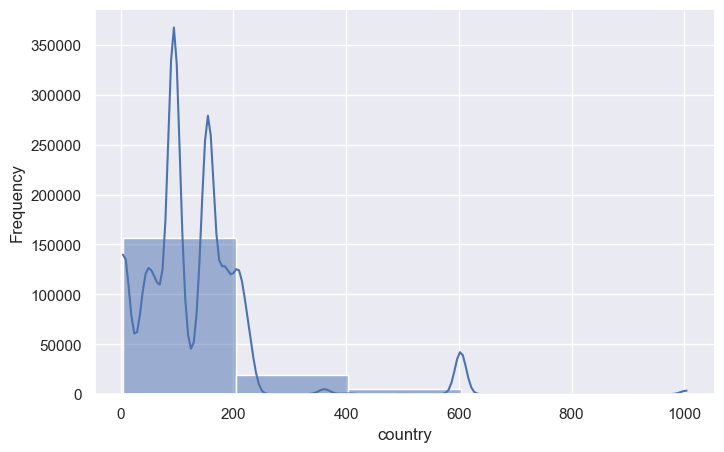

<Figure size 800x500 with 0 Axes>

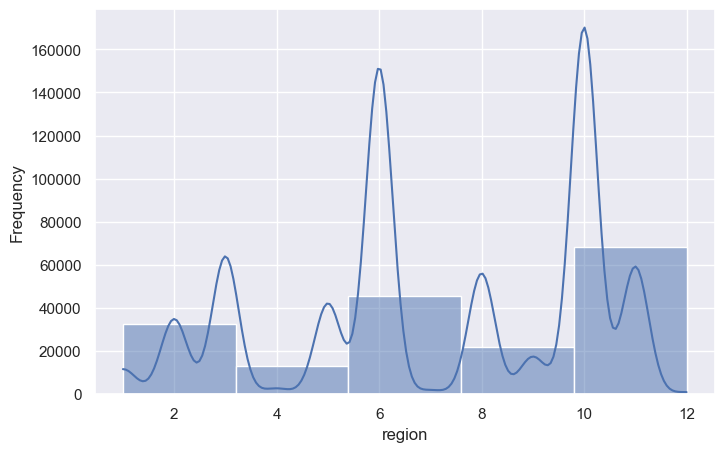

<Figure size 800x500 with 0 Axes>

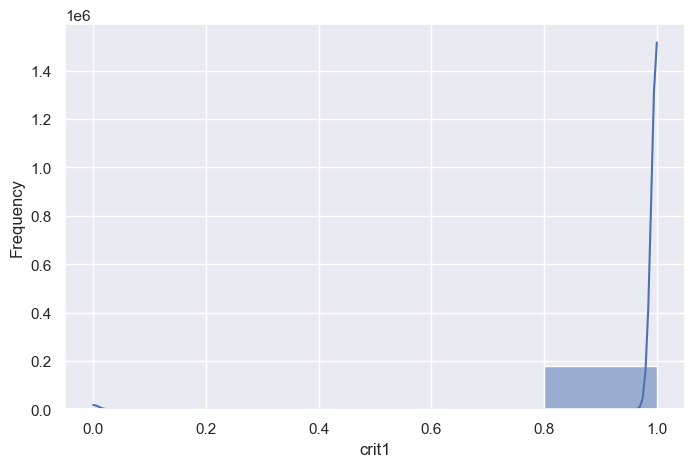

<Figure size 800x500 with 0 Axes>

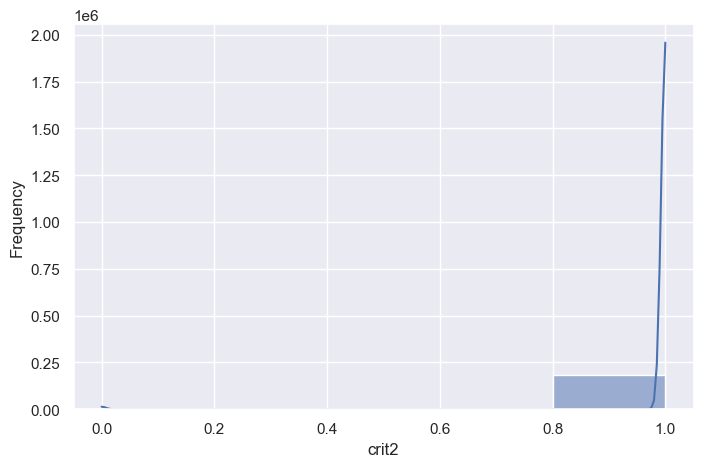

<Figure size 800x500 with 0 Axes>

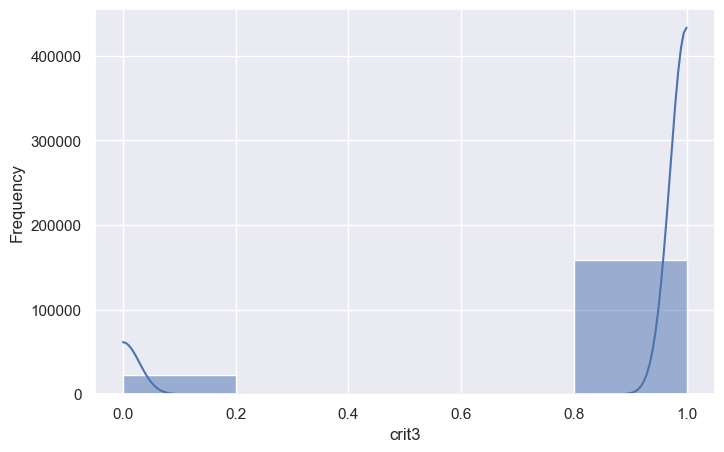

<Figure size 800x500 with 0 Axes>

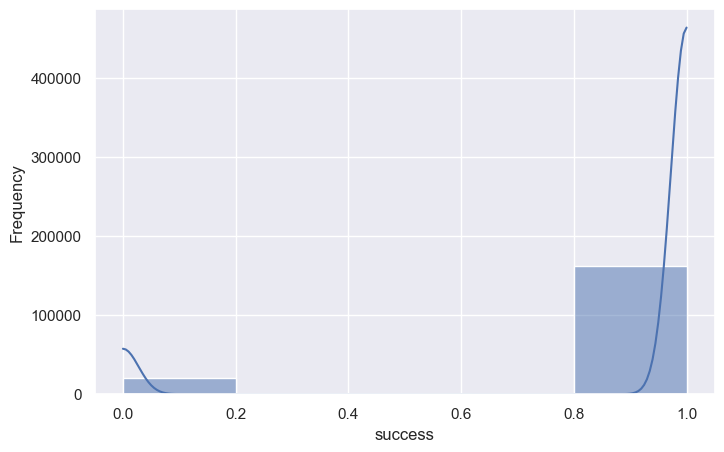

<Figure size 800x500 with 0 Axes>

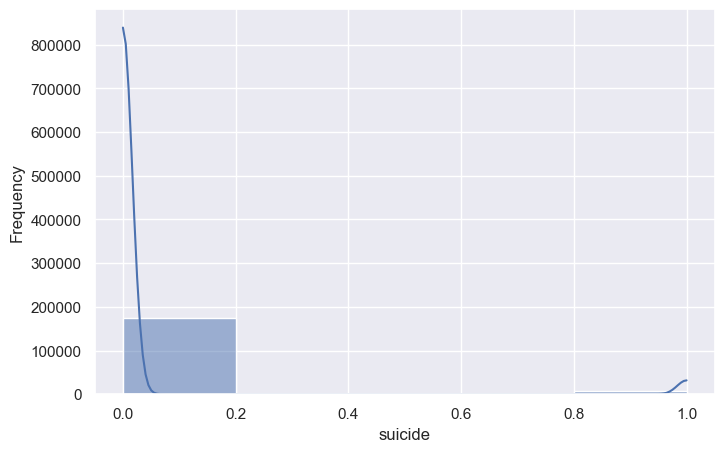

<Figure size 800x500 with 0 Axes>

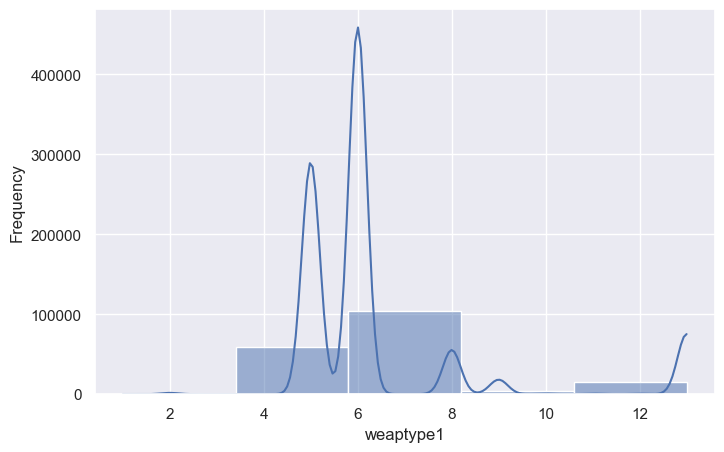

<Figure size 800x500 with 0 Axes>

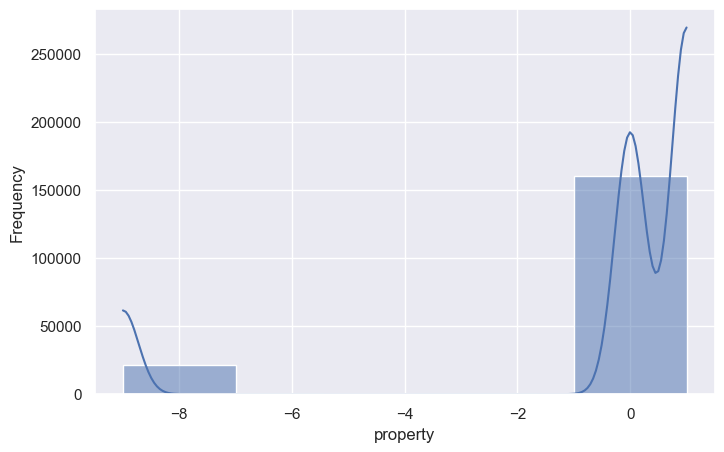

<Figure size 800x500 with 0 Axes>

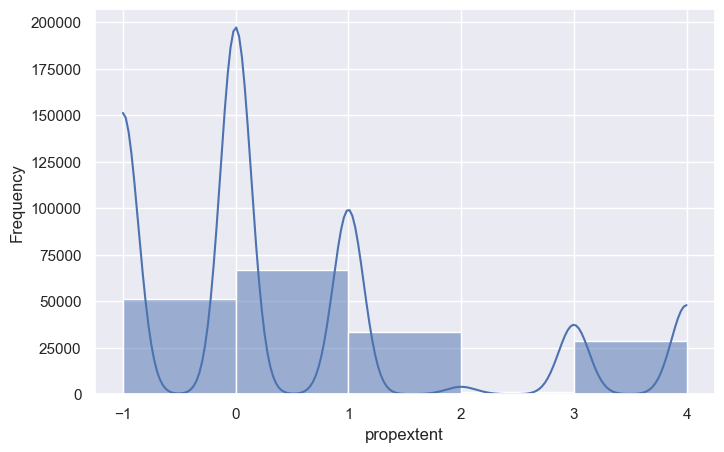

<Figure size 800x500 with 0 Axes>

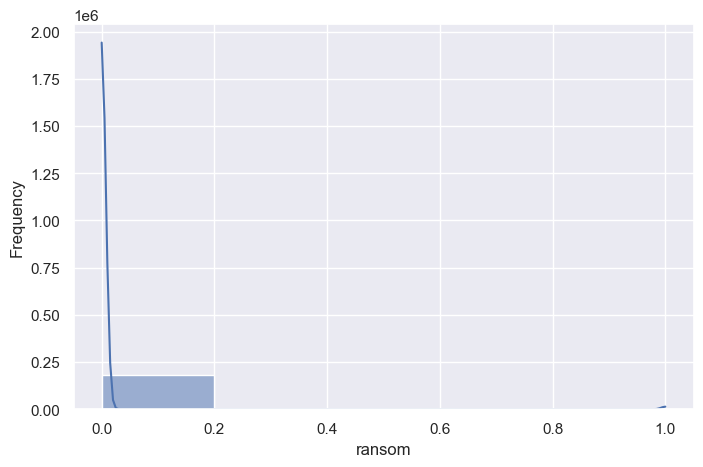

<Figure size 800x500 with 0 Axes>

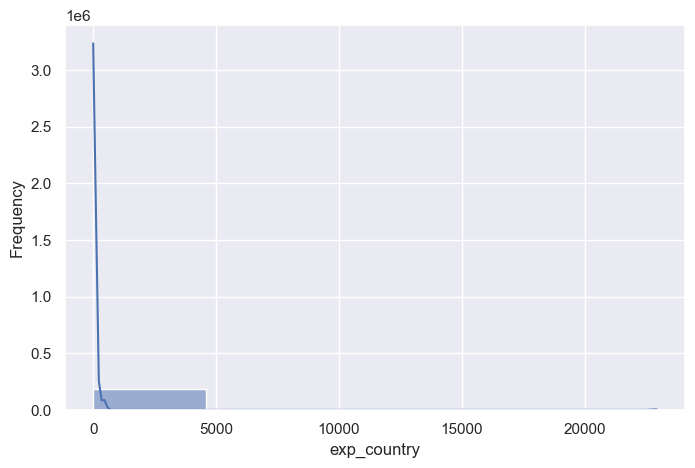

<Figure size 800x500 with 0 Axes>

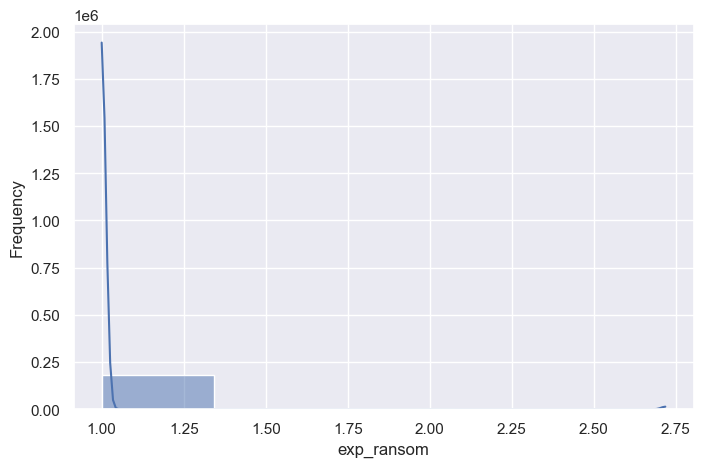

<Figure size 800x500 with 0 Axes>

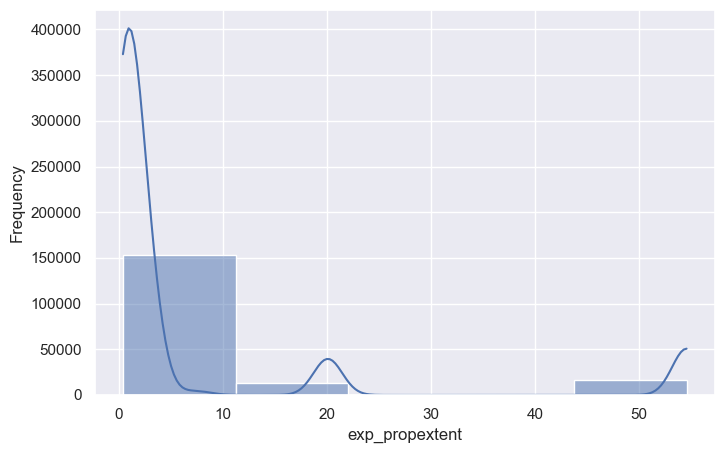

<Figure size 800x500 with 0 Axes>

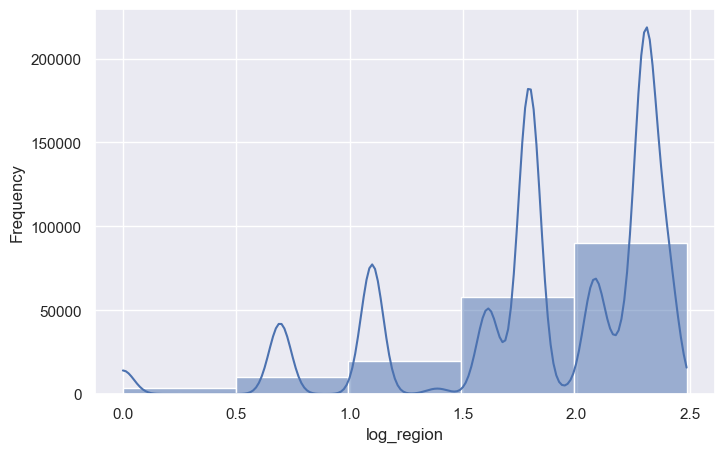

<Figure size 800x500 with 0 Axes>

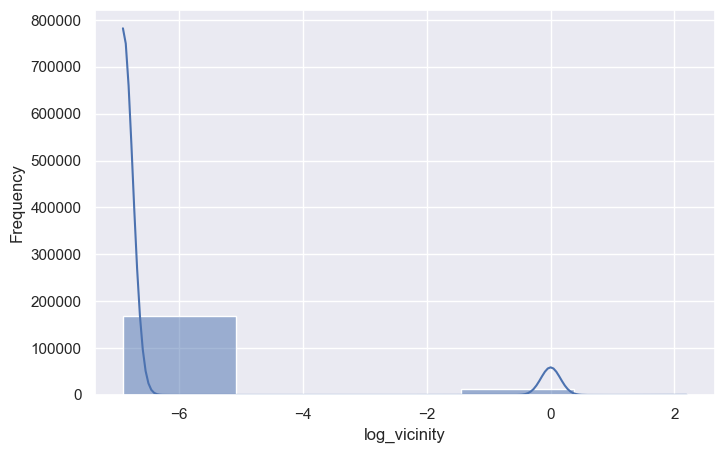

<Figure size 800x500 with 0 Axes>

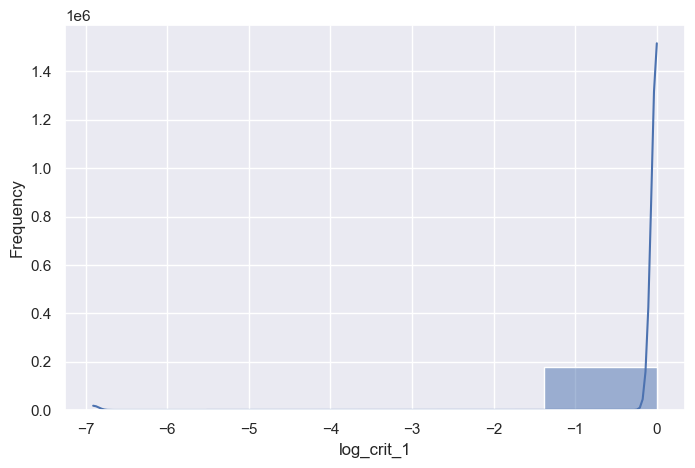

<Figure size 800x500 with 0 Axes>

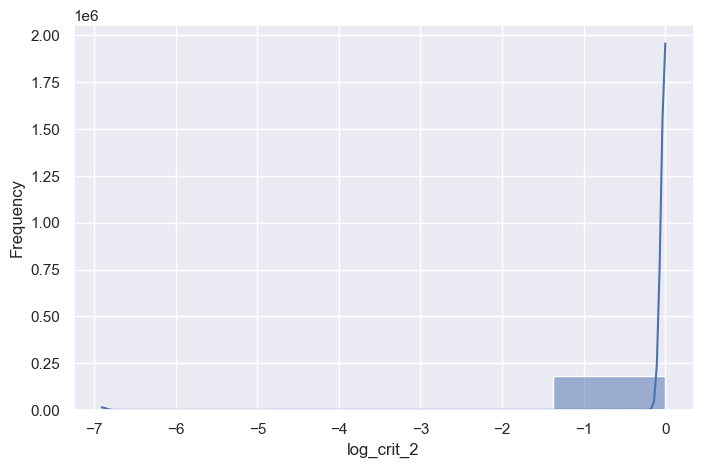

<Figure size 800x500 with 0 Axes>

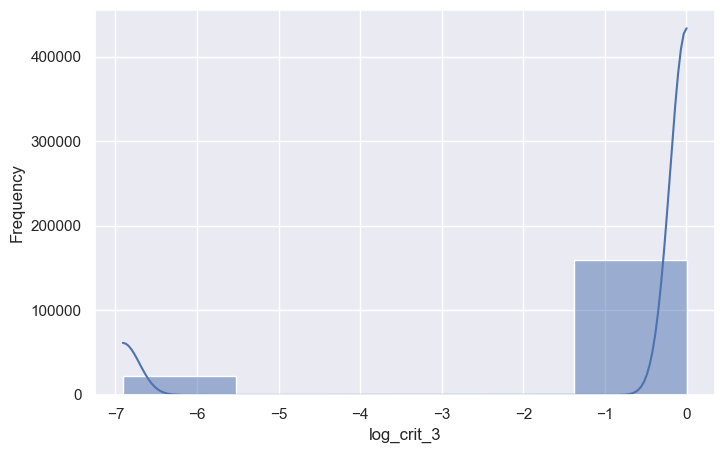

<Figure size 800x500 with 0 Axes>

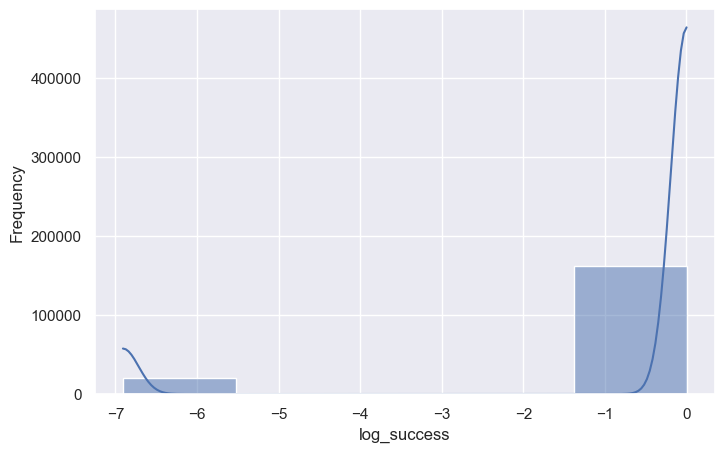

<Figure size 800x500 with 0 Axes>

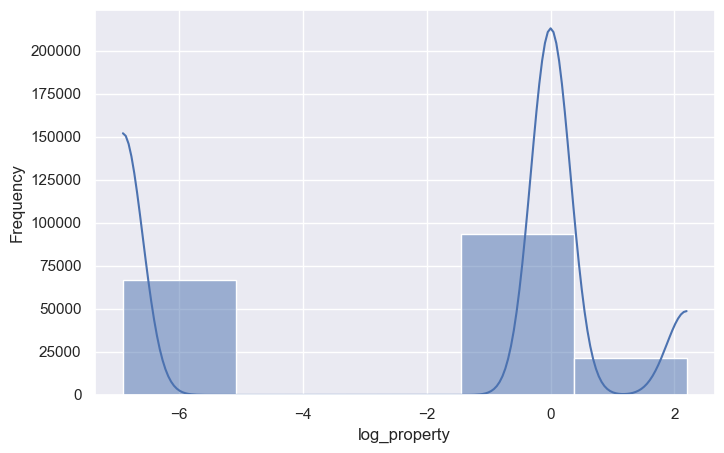

In [201]:
#as seen by the data, the R-squared statistic has not changed with the transformations made so far
#replot histograms with transformations
#plot a histogram of each of the dependant variables in the model to see which way the dependant variables are skewed
for col in X_reg_transform.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_hist) = plt.subplots()
    plt.gca().set(xlabel= col,ylabel='Frequency')
    sns.histplot(X_reg_transform[col], ax=ax_hist , bins = 5,kde=True)

In [202]:
#use MinMaxScaler to normalize the data toward the mean
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X_reg_transform)

scaled_X = pd.DataFrame(scaled_data, columns = X_reg_transform.columns)

In [204]:
scaled_X.shape

(181646, 21)

In [205]:
#going to use outlier detection to detect all of the outliers in the model
threshold = 1.5 #set threshold to remove as many outliers as possible

scaled_rm_outliers = scaled_X[(np.abs(stats.zscore(scaled_X)) < threshold).all(axis=1)]
scaled_rm_outliers.shape

#(124472,

(71654, 21)

/var/folders/59/vc05kjdn7s14r9w654dq4xlh0000gn/T/ipykernel_9847/2362024742.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 800x500 with 0 Axes>

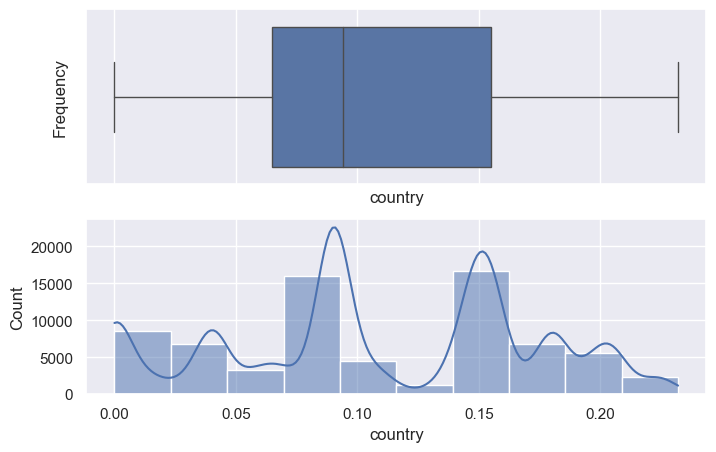

<Figure size 800x500 with 0 Axes>

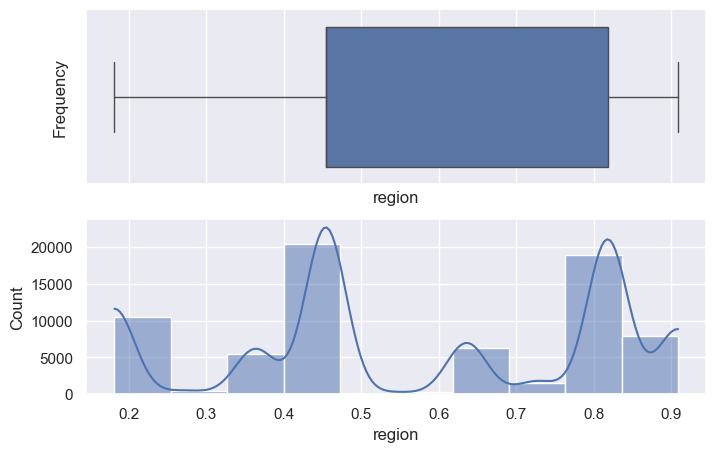

<Figure size 800x500 with 0 Axes>

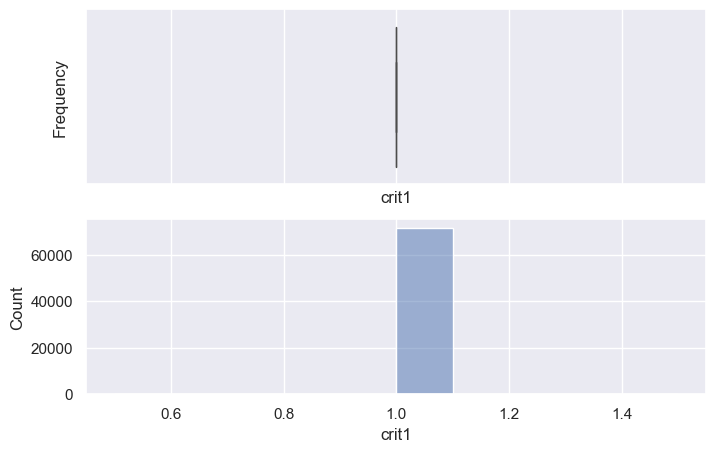

<Figure size 800x500 with 0 Axes>

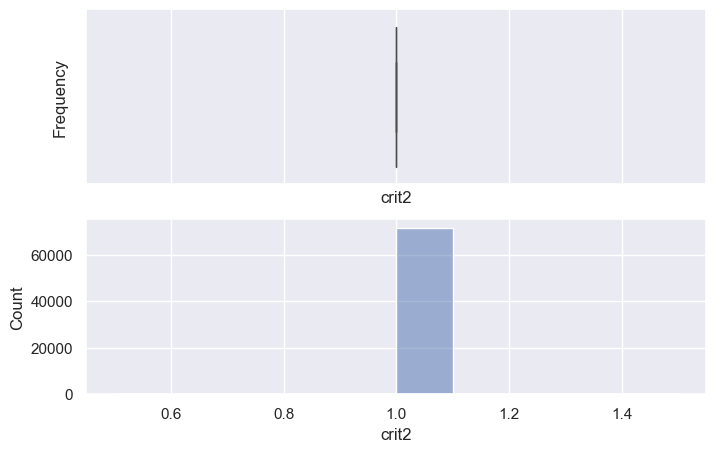

<Figure size 800x500 with 0 Axes>

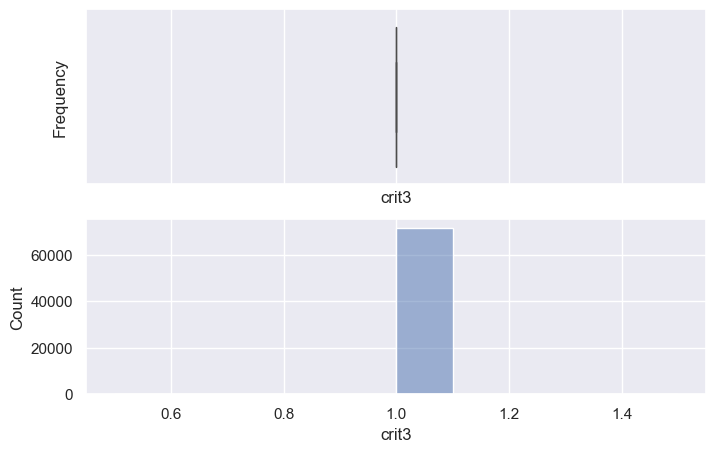

<Figure size 800x500 with 0 Axes>

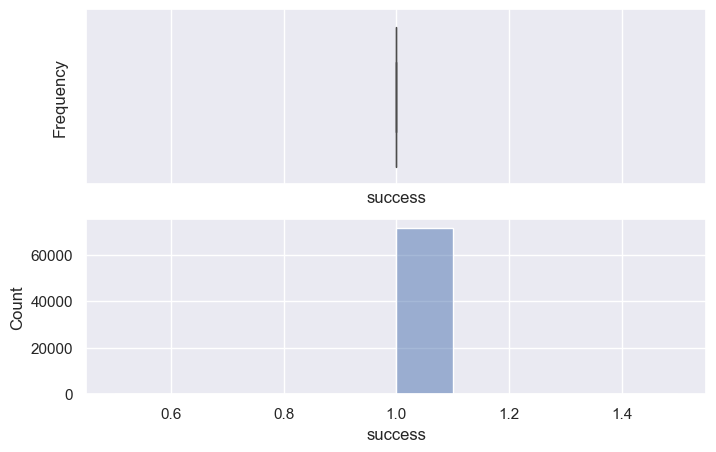

<Figure size 800x500 with 0 Axes>

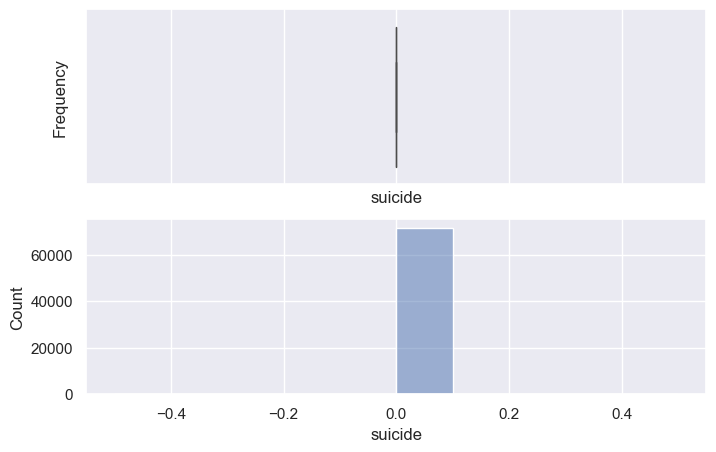

<Figure size 800x500 with 0 Axes>

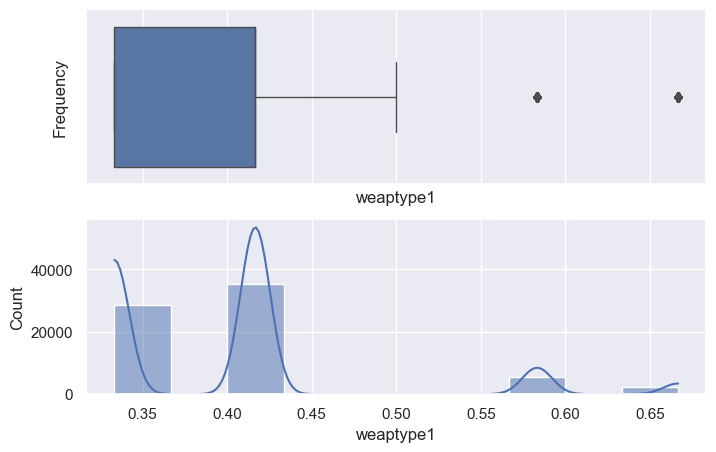

<Figure size 800x500 with 0 Axes>

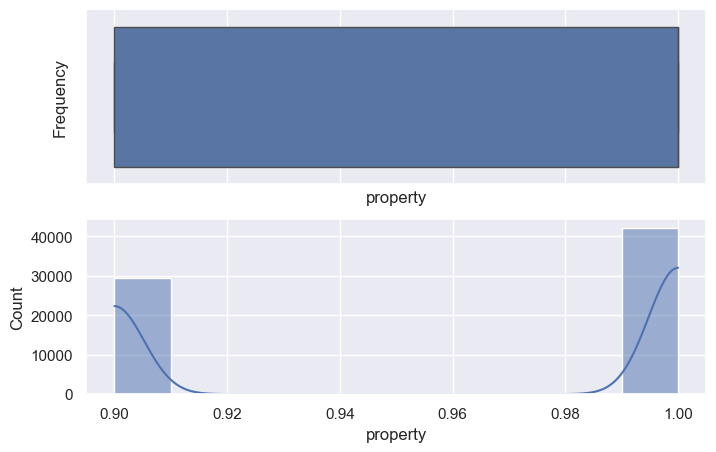

<Figure size 800x500 with 0 Axes>

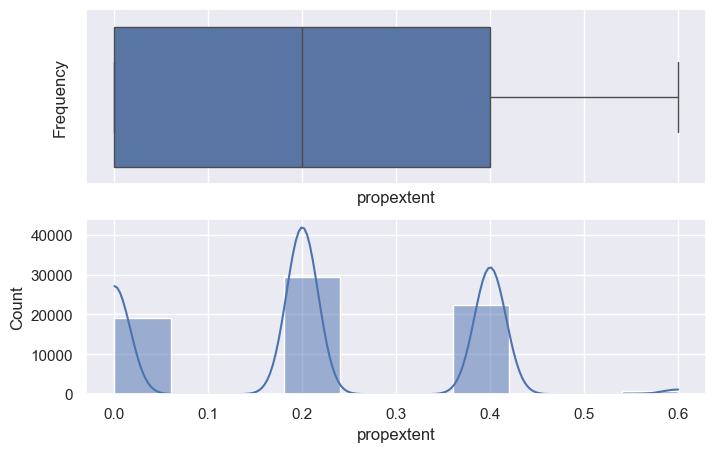

<Figure size 800x500 with 0 Axes>

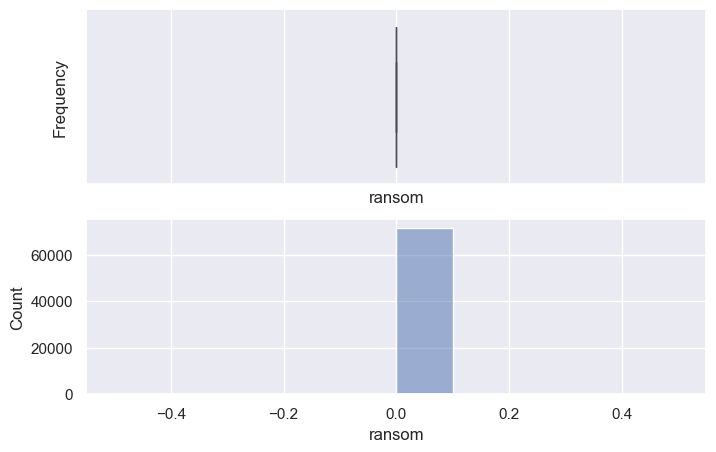

<Figure size 800x500 with 0 Axes>

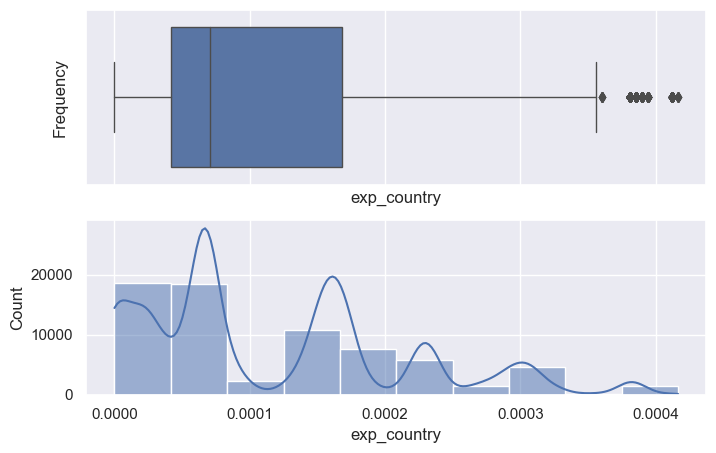

<Figure size 800x500 with 0 Axes>

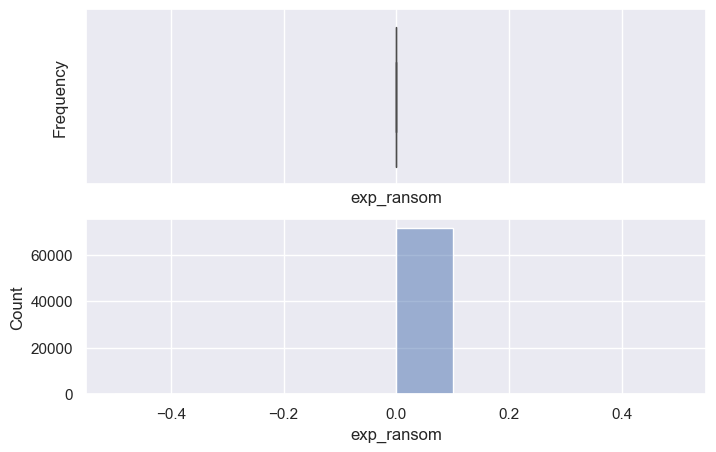

<Figure size 800x500 with 0 Axes>

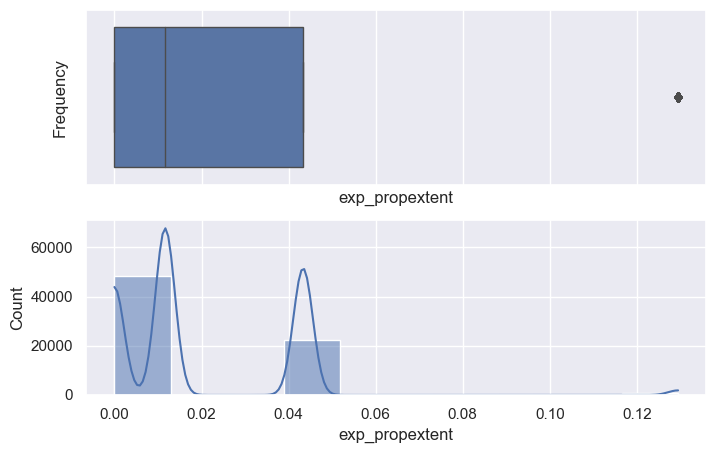

<Figure size 800x500 with 0 Axes>

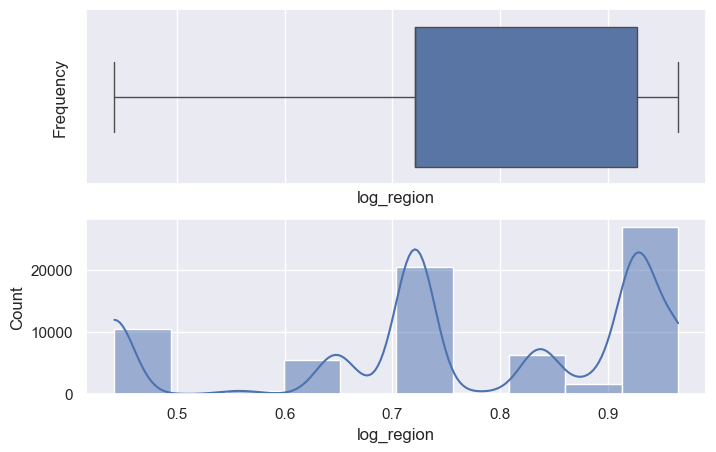

<Figure size 800x500 with 0 Axes>

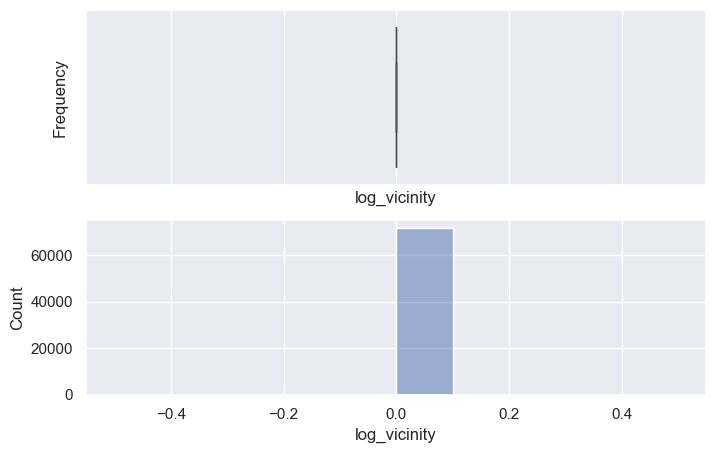

<Figure size 800x500 with 0 Axes>

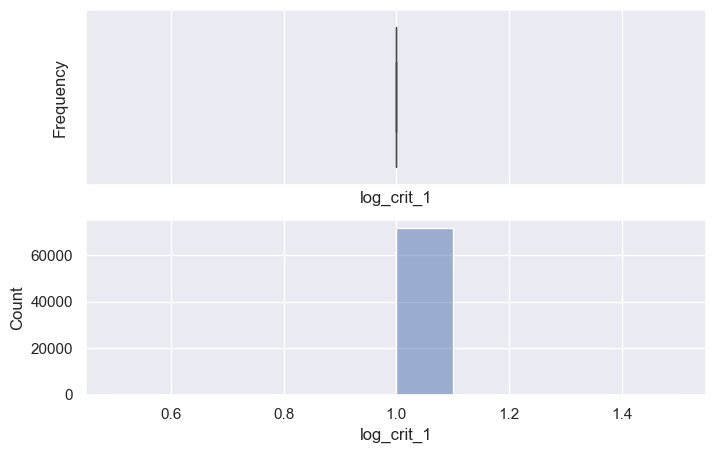

<Figure size 800x500 with 0 Axes>

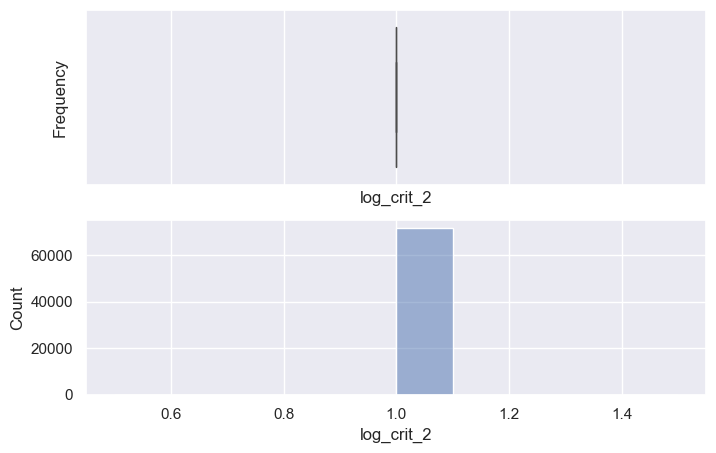

<Figure size 800x500 with 0 Axes>

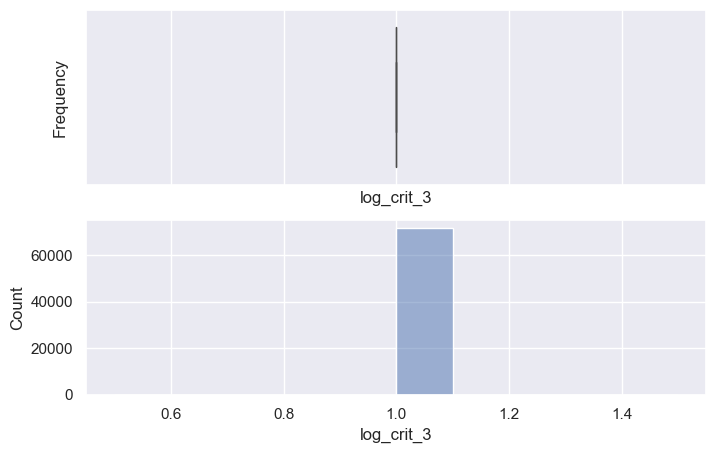

<Figure size 800x500 with 0 Axes>

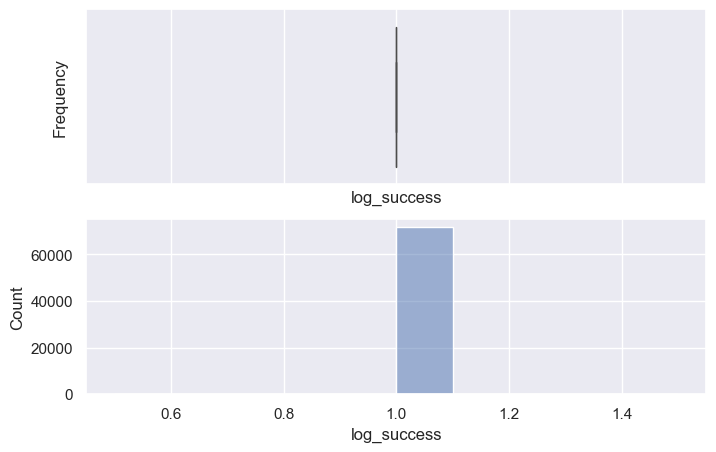

<Figure size 800x500 with 0 Axes>

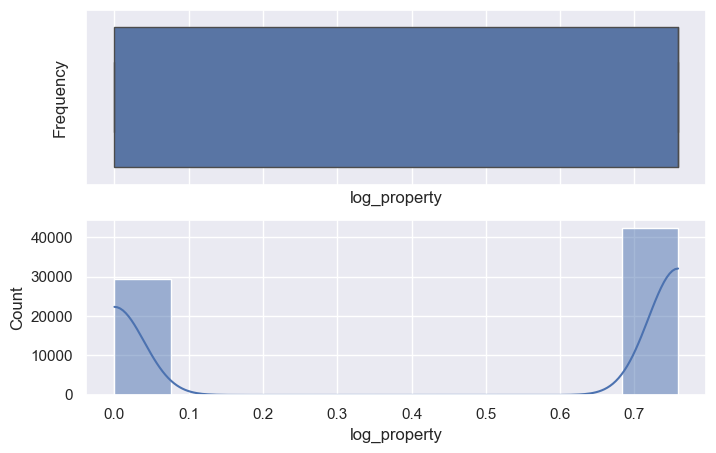

In [206]:
for col in scaled_rm_outliers.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})

    fig, axes = plt.subplots(2, sharex=True)
    axes[0].set(xlabel=col, ylabel='Frequency')
    sns.boxplot(data=scaled_rm_outliers, x=col, ax=axes[0], linewidth=1.0)
    sns.histplot(data=scaled_rm_outliers, x=col, ax=axes[1], bins=10, kde=True)

In [207]:
#model again
model_results, y_pred = linear_regression_model(scaled_X, y)

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     825.0
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:48:51   Log-Likelihood:            -4.7523e+05
No. Observations:              145316   AIC:                         9.505e+05
Df Residuals:                  145299   BIC:                         9.507e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.5222      0.337     43.

In [208]:
print(scaled_rm_outliers.shape)  # Shape of the X variable

y = y.reindex(scaled_rm_outliers.index)
print(y.shape)    

(71654, 21)
(71654,)


In [209]:
#taking out the outliers almost doubled the model performance
model_results, y_pred = linear_regression_model(scaled_rm_outliers, y)

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     81.19
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          1.64e-150
Time:                        12:48:51   Log-Likelihood:            -1.8998e+05
No. Observations:               57323   AIC:                         3.800e+05
Df Residuals:                   57313   BIC:                         3.801e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
country            8.2781      1.510      5.

In [233]:
scaled_regression = scaled_rm_outliers.drop(columns=[
    'log_vicinity', 
    'log_crit_1',
     'log_crit_2', 
     'log_crit_3', 
     'exp_ransom', 
     'ransom', 
     'log_success', 
     'exp_propextent', 
     'suicide', 
     'success',
     'log_property',
     'crit1', 
     #variables below were originally significant but removed to reduce multicolinierity
     'crit2', 
     'crit3', 
     'log_region',
     'country'
    ])

In [232]:
model_results, y_pred = linear_regression_model(scaled_regression, y)

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              targtype1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     138.2
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          1.58e-174
Time:                        12:56:24   Log-Likelihood:            -1.8993e+05
No. Observations:               57323   AIC:                         3.799e+05
Df Residuals:                   57316   BIC:                         3.799e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.2518      0.554     14.897      

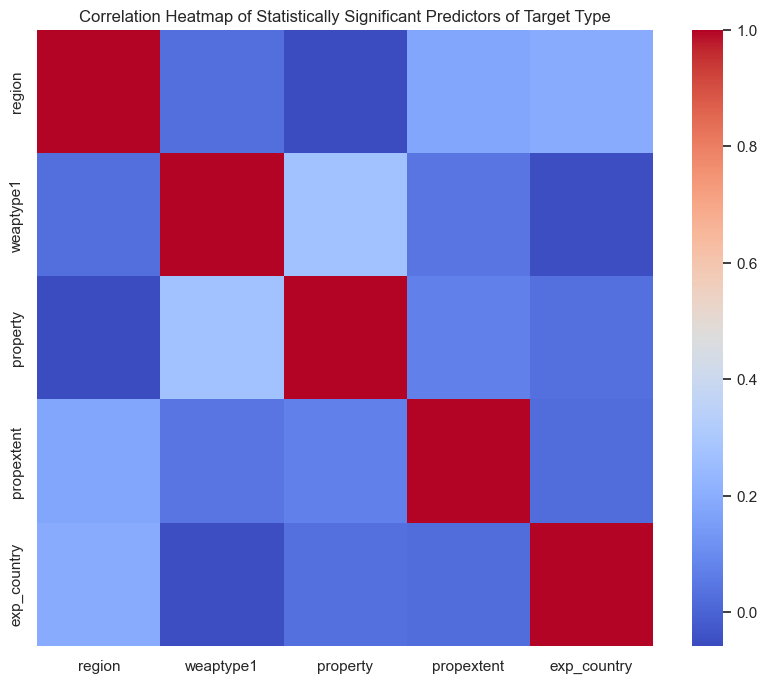

In [234]:
corr = scaled_regression.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Statistically Significant Predictors of Target Type")
plt.show()

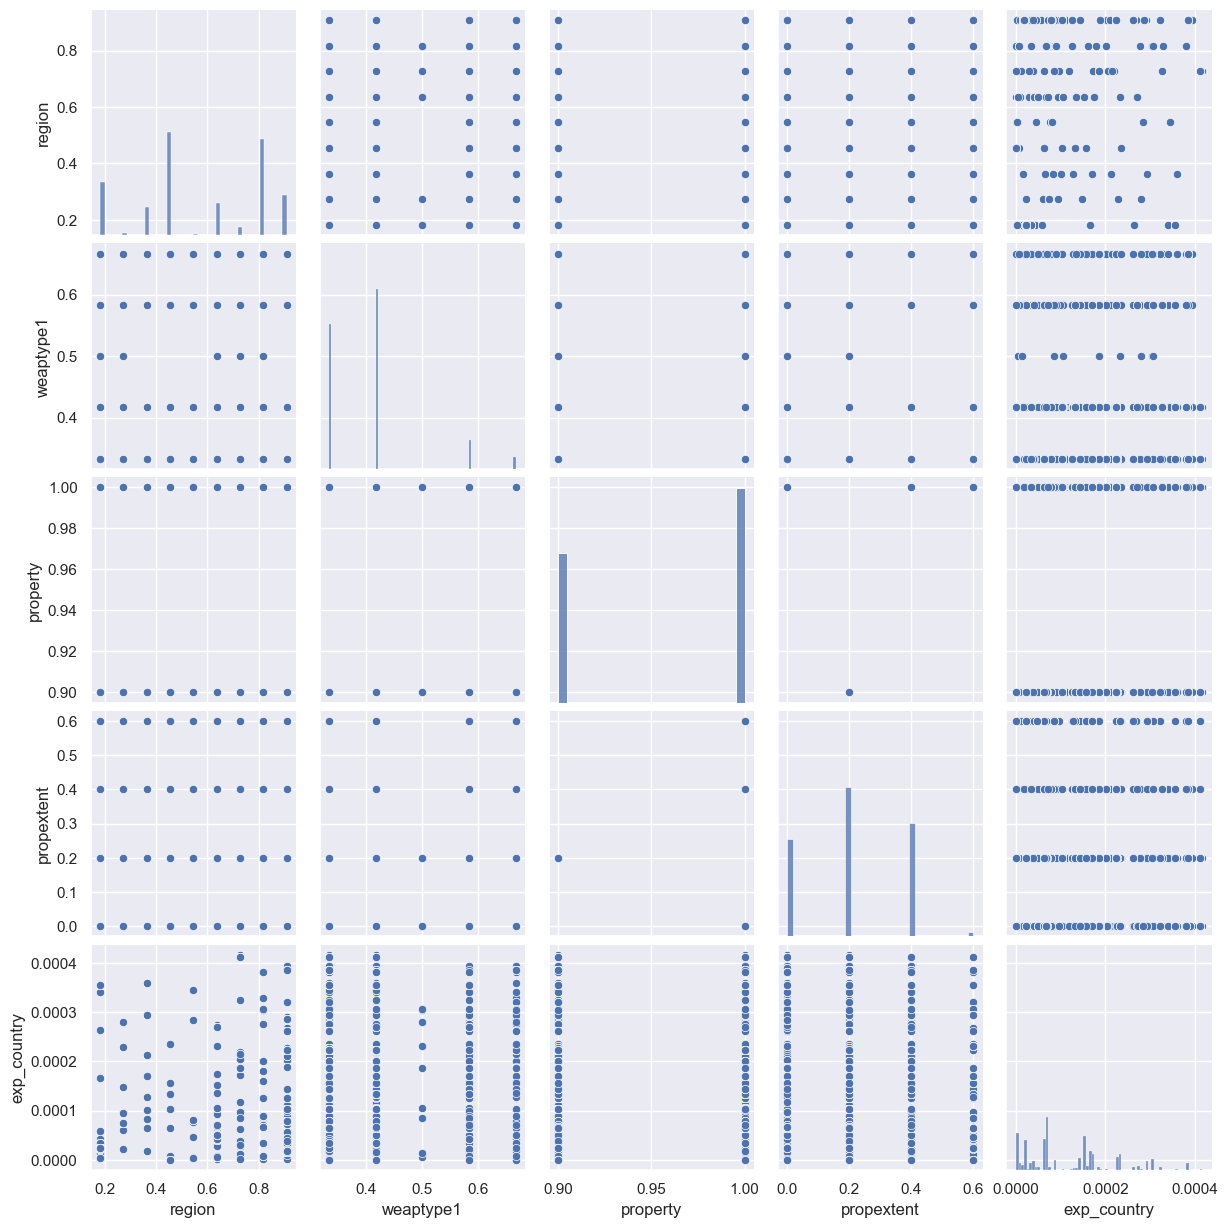

In [242]:
#create a pairplot of the data
sns.pairplot(scaled_regression)

# Show the plot
plt.show()